<a id=top-page></a>
# Cost function demonstration

In this notebook, we schematically illustrate how our cost function is constructed from a penalized area under the $\hat{\mathcal{D}}(\sigma)$ curve.

The analysis in this notebook is performed in the following steps:

- [Load the reacting flow data](#data)
- [Demonstrate $\hat{\mathcal{D}}(\sigma)$ on a manifold with overlap](#overlap)
- [Demonstrate the penalty function, $P$, and the cost function, $\mathcal{L}$](#cost-function)
- [Demonstrate comparison with an improved manifold](#improved)

***

In [1]:
%run -i imports.py
%matplotlib inline

In [2]:
bandwidth_values = np.logspace(-4, 1, 200)
penalty = 'log-sigma-over-peak'
norm = 'max'
power = 1
colormap = 'Blues_r'
save_figures = True
n_components = 2

<a id=data></a>
***

## Load the reacting flow data

[Go to the top](#top-page)

In [3]:
state_space = pd.read_csv('../data/reacting-flow-syngas-air-steady-with-transient-extinction-state-space.csv', header=None).to_numpy()
state_space_sources = pd.read_csv('../data/reacting-flow-syngas-air-steady-with-transient-extinction-state-space-sources.csv', header=None).to_numpy()

<a id=overlap></a>
***

## Demonstrate $\hat{\mathcal{D}}(\sigma)$ on a manifold with overlap

[Go to the top](#top-page)

In [4]:
pca = reduction.PCA(state_space, scaling='auto', n_components=n_components)
PCs = pca.transform(state_space)
norm_PCs, _, _ = preprocess.center_scale(PCs, scaling='0to1')
PC_sources = pca.transform(state_space_sources, nocenter=True)
norm_PC_sources, _, _ = preprocess.center_scale(PC_sources, scaling='0to1')

Compute the cost:

In [5]:
# tic = time.perf_counter()

# variance_data = analysis.compute_normalized_variance(PCs, 
#                                                      PC_sources[:,0:1], 
#                                                      depvar_names=['var'], 
#                                                      bandwidth_values=bandwidth_values)

# derivative, sigmas, _ = analysis.normalized_variance_derivative(variance_data)

# derivatives = derivative['var']

# toc = time.perf_counter()
# print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

# np.savetxt('../results/Figure-1a-sigmas.csv', (sigmas), delimiter=',', fmt='%.16e')
# np.savetxt('../results/Figure-1a-derivatives.csv', (derivative['var']), delimiter=',', fmt='%.16e')

In [6]:
# cost = analysis.cost_function_normalized_variance_derivative(variance_data,
#                                                              penalty_function=penalty,
#                                                              power=power,
#                                                              norm=norm,
#                                                              integrate_to_peak=False)

# np.savetxt('../results/Figure-1a-cost.csv', ([cost]), delimiter=',', fmt='%.16e')

# print(cost)

...or load the precomputed quantities:

In [7]:
cost = pd.read_csv('../results/Figure-1a-cost.csv', header=None).to_numpy().ravel()[0]
sigmas = pd.read_csv('../results/Figure-1a-sigmas.csv', header=None).to_numpy().ravel()
derivatives = pd.read_csv('../results/Figure-1a-derivatives.csv', header=None).to_numpy().ravel()

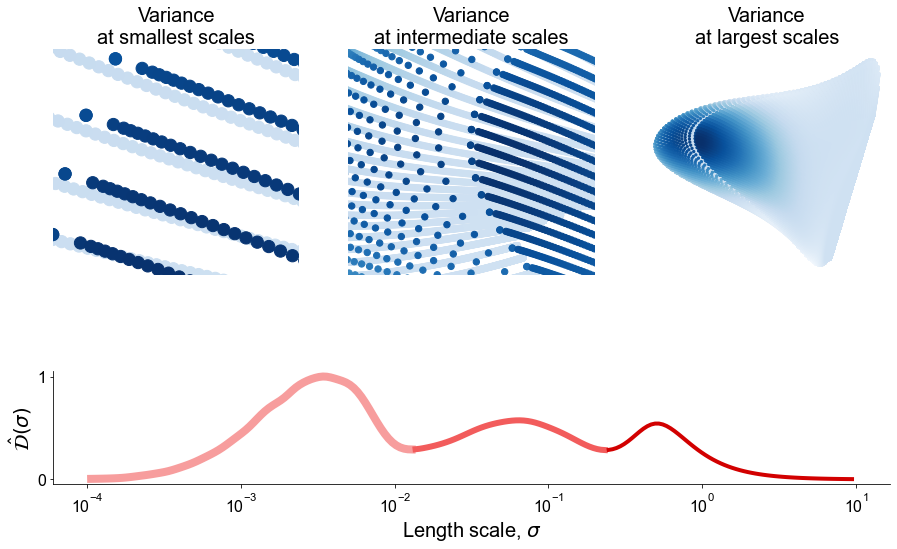

In [8]:
fig = plt.figure(figsize=(15, 8))
widths = [1, 1, 1]
heights = [1, 0.2, 0.5]
spec = fig.add_gridspec(ncols=3, nrows=3, width_ratios=widths, height_ratios=heights)

ax = fig.add_subplot(spec[0,0])
closeup_x = 0.18
closeup_y = 0.62
extend_x = 0.05
extend_y = 0.05
plt.scatter(norm_PCs[:,0], norm_PCs[:,1], c=norm_PC_sources[:,0], cmap=colormap, s=150)
plt.xlim([closeup_x,closeup_x+extend_x])
plt.ylim([closeup_y,closeup_y+extend_y])
plt.xticks([])
plt.yticks([])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.title('Variance\nat smallest scales', fontsize=20)

ax = fig.add_subplot(spec[0,1])
closeup_x = 0.08
closeup_y = 0.5
extend_x = 0.2
extend_y = 0.2
plt.scatter(norm_PCs[:,0], norm_PCs[:,1], c=norm_PC_sources[:,0], cmap=colormap, s=40)
plt.xlim([closeup_x,closeup_x+extend_x])
plt.ylim([closeup_y,closeup_y+extend_y])
plt.xticks([])
plt.yticks([])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.title('Variance\nat intermediate scales', fontsize=20)

ax = fig.add_subplot(spec[0,2])
plt.scatter(PCs[:,0], PCs[:,1], c=norm_PC_sources[:,0], cmap=colormap, s=5)
plt.xticks([])
plt.yticks([])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.title('Variance\nat largest scales', fontsize=20)

ax = fig.add_subplot(spec[2,0:3])
c1 = '#fcdede'
c2 = '#f79d9d'
c3 = '#f25c5c'
c4 = '#d20000'
plt.semilogx(sigmas[0:84], derivatives[0:84], color=c2, lw=8)
plt.semilogx(sigmas[84:134], derivatives[84:134], color=c3, lw=6)
plt.semilogx(sigmas[134::], derivatives[134::], color=c4, lw=4)
plt.xlabel('Length scale, $\sigma$', fontsize=20)
plt.ylabel('$\hat{\mathcal{D}}(\sigma)$', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.yticks([0,1])
plt.minorticks_off()

if save_figures: plt.savefig('../figures/Figure-1a.png', dpi=200, bbox_inches='tight')

<a id=cost-function></a>
***

## Demonstrate the penalty function, $P$, and the cost function, $\mathcal{L}$

[Go to the top](#top-page)

In [9]:
idx_peaks, _ = find_peaks(derivatives, height=0)
rightmost_peak_location = sigmas[idx_peaks[-1]]
idx_rightmost_peak = idx_peaks[-1]

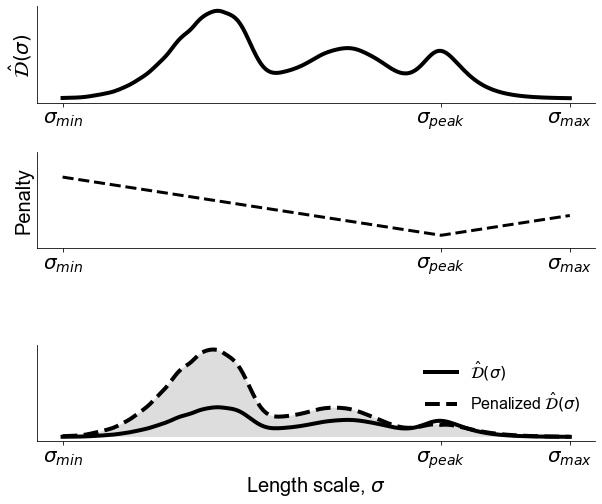

In [10]:
fig = plt.figure(figsize=(10, 8))
widths = [1]
heights = [1, 0.2, 1, 0.7, 1]
spec = fig.add_gridspec(ncols=1, nrows=5, width_ratios=widths, height_ratios=heights)

ax = fig.add_subplot(spec[0,0])
plt.semilogx(sigmas, derivatives, '-', c='k', lw=4)
plt.ylabel('$\hat{\mathcal{D}}(\sigma)$', fontsize=20)
plt.xticks([np.min(sigmas), rightmost_peak_location, np.max(sigmas)], ['$\sigma_{min}$', '$\sigma_{peak}$', '$\sigma_{max}$'], fontsize=20)
plt.yticks([])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.minorticks_off()

ax = fig.add_subplot(spec[2,0])
plt.semilogx(sigmas, abs(np.log10(sigmas/rightmost_peak_location)) + 1, 'k--', lw=3, label="weight='log-sigma-over-peak'")
plt.ylabel('Penalty', fontsize=20)
plt.xticks([])
plt.yticks([])
plt.minorticks_off()
ax.yaxis.tick_right()
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.ylim([0.2,6.3])
plt.xticks([np.min(sigmas), rightmost_peak_location, np.max(sigmas)], ['$\sigma_{min}$', '$\sigma_{peak}$', '$\sigma_{max}$'], fontsize=20)

ax = fig.add_subplot(spec[4,0])
normalized_sigma, _, _ = preprocess.center_scale(np.log10(sigmas[:,None]), scaling='0to1')
addition = normalized_sigma[idx_rightmost_peak][0]
penalty_function = abs(np.log10(sigmas/rightmost_peak_location)) + addition
plt.semilogx(sigmas, derivatives, '-', c='k', lw=4, label='$\hat{\mathcal{D}}(\sigma)$')
plt.semilogx(sigmas, penalty_function * derivatives, '--', c='k', lw=4, label='Penalized $\hat{\mathcal{D}}(\sigma)$')
plt.xlabel('$\sigma$')
plt.fill_between(sigmas, penalty_function * derivatives, facecolor='#dddddd')
plt.xlabel('Length scale, $\sigma$', fontsize=20)
plt.xticks([np.min(sigmas), rightmost_peak_location, np.max(sigmas)], ['$\sigma_{min}$', '$\sigma_{peak}$', '$\sigma_{max}$'], fontsize=20)
plt.yticks([])
plt.minorticks_off()
plt.legend(ncol=1, fontsize=16, frameon=False, loc='upper right')
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

if save_figures: plt.savefig('../figures/Figure-1b.svg', dpi=200, bbox_inches='tight')

<a id=improved></a>
***

## Demonstrate comparison with an improved manifold

[Go to the top](#top-page)

In [11]:
pca_improved = reduction.PCA(state_space, scaling='pareto', n_components=n_components)
PCs_improved = pca_improved.transform(state_space)

Compute the cost:

In [12]:
# tic = time.perf_counter()

# variance_data_improved = analysis.compute_normalized_variance(PCs_improved,
#                                                               PC_sources[:,0:1], 
#                                                               depvar_names=['var'],
#                                                               bandwidth_values=bandwidth_values)

# derivative_improved, sigmas_improved, _ = analysis.normalized_variance_derivative(variance_data_improved)

# derivatives_improved = derivative_improved['var']

# toc = time.perf_counter()
# print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

# np.savetxt('../results/Figure-1c-sigmas-improved.csv', (sigmas_improved), delimiter=',', fmt='%.16e')
# np.savetxt('../results/Figure-1c-derivatives-improved.csv', (derivative_improved['var']), delimiter=',', fmt='%.16e')

	Time it took: 58.7 minutes.
----------------------------------------


In [13]:
# cost_improved = analysis.cost_function_normalized_variance_derivative(variance_data_improved, 
#                                                                       penalty_function=penalty, 
#                                                                       norm=norm, 
#                                                                       integrate_to_peak=False)

# np.savetxt('../results/Figure-1c-cost-improved.csv', ([cost_improved]), delimiter=',', fmt='%.16e')

# print(cost_improved)

1.1262220756734453


...or load the precomputed quantities:

In [16]:
cost_improved = pd.read_csv('../results/Figure-1c-cost-improved.csv', header=None).to_numpy().ravel()[0]
sigmas_improved = pd.read_csv('../results/Figure-1c-sigmas-improved.csv', header=None).to_numpy().ravel()
derivatives_improved = pd.read_csv('../results/Figure-1c-derivatives-improved.csv', header=None).to_numpy().ravel()

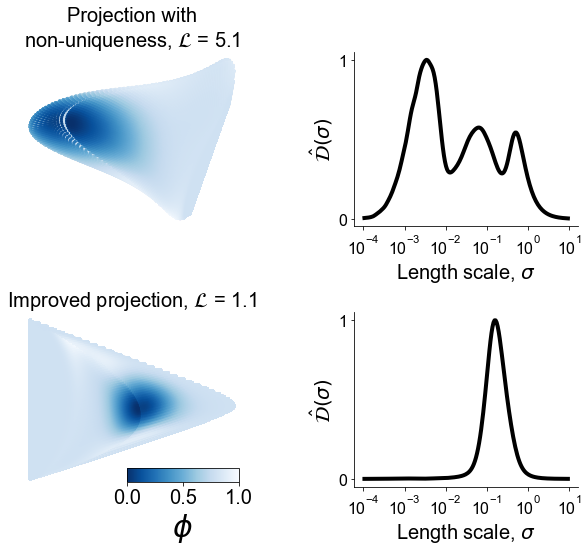

In [18]:
fig = plt.figure(figsize=(10, 8))
widths = [1, 0.2, 1]
heights = [1, 0.2, 1]
spec = fig.add_gridspec(ncols=3, nrows=3, width_ratios=widths, height_ratios=heights)

ax = fig.add_subplot(spec[0,0])
plt.scatter(PCs[:,0], PCs[:,1], c=norm_PC_sources[:,0], cmap=colormap, s=5)
plt.xticks([])
plt.yticks([])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.title('Projection with\nnon-uniqueness, $\mathcal{L}$ = ' + str(round(cost,1)), fontsize=20)

ax = fig.add_subplot(spec[0,2])
plt.semilogx(sigmas, derivatives, color='k', lw=4)
plt.xlabel('Length scale, $\sigma$', fontsize=20)
plt.ylabel('$\hat{\mathcal{D}}(\sigma)$', fontsize=20)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xticks(fontsize=16)
plt.yticks([0,1], fontsize=16)
plt.minorticks_off()

ax = fig.add_subplot(spec[2,0])
scat = plt.scatter(PCs_improved[:,0], PCs_improved[:,1], c=norm_PC_sources[:,0], cmap=colormap, s=5)
plt.xticks([])
plt.yticks([])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.title('Improved projection, $\mathcal{L}$ = ' + str(round(cost_improved,1)), fontsize=20)
cbaxes = inset_axes(ax, width="50%", height="8%", loc='lower right')
cbar = plt.colorbar(scat, ticks=[0,0.5,1], orientation='horizontal', aspect=8, cax=cbaxes)
cbar.ax.set_xlabel('$\phi$', fontsize=30, rotation=0)
for t in cbar.ax.get_xticklabels():
     t.set_fontsize(20)

ax = fig.add_subplot(spec[2,2])
plt.semilogx(sigmas_improved, derivatives_improved, color='k', lw=4)
plt.xlabel('Length scale, $\sigma$', fontsize=20)
plt.ylabel('$\hat{\mathcal{D}}(\sigma)$', fontsize=20)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xticks(fontsize=16)
plt.yticks([0,1], fontsize=16)
plt.minorticks_off()

if save_figures: plt.savefig('../figures/Figure-1c.png', dpi=300, bbox_inches='tight')

***